In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
X_training = pd.read_csv("train.csv")

In [20]:

X_data = np.array(X_training).T
X_train = X_data[1:785]
X_train.shape



X_train_1 = X_train[:, 0:10000] # each single column is an image
X_train_1.shape




X_train_1.shape



(784, 10000)

In [8]:
#X_train = (X_train.astype('float32') / 255.0 * 0.99) + 0.01


In [21]:
Y_train = X_data[0]
Y_targs = np.eye(10)[Y_train]

Y_targs = Y_targs.T
Y_targs.shape


Y_targs_1 = Y_targs[:, 0:10000]
Y_targs_1.shape


(10, 10000)

In [22]:
class MLP():
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        
        self.input_weights = np.random.randn(self.hidden_nodes, self.input_nodes) / np.sqrt(self.input_nodes)
        #self.input_weights = np.random.uniform(-0.02, 0.02, (self.hidden_nodes, self.input_nodes)) / np.sqrt(self.input_nodes)
        self.hidden_weights = np.random.rand(self.output_nodes, self.hidden_nodes) / np.sqrt(self.hidden_nodes)
        #self.hidden_weights = np.random.uniform(-0.02, 0.02, (self.output_nodes, self.hidden_nodes)) / np.sqrt(self.hidden_nodes)
        #self.hidden_bias = np.random.rand(self.output_nodes, 1) - 0.5
        #self.input_bias = np.random.rand(self.hidden_nodes, 1) - 0.5
        self.hidden_bias = np.zeros((self.output_nodes, 1))
        self.input_bias = np.zeros((self.hidden_nodes, 1))
         
        
    def feed_forward(self,X):
        
        self.Z1 = np.dot(self.input_weights, X) + self.input_bias
        #self.A1 = self.sigmoid(self.Z1)
        self.A1 = self.LReLU(self.Z1)
        self.Z2 = np.dot(self.hidden_weights, self.A1) + self.hidden_bias
        out = self.softmax(self.Z2)
        
        return out
        
        
        
    def sigmoid(self, x):
        return np.where(x >= 0, 
                    1 / (1 + np.exp(-x)), 
                    np.exp(x) / (1 + np.exp(x)))
    
    def softmax(self,Z):
        A = np.exp(Z) / sum(np.exp(Z))
        return A
    
    def LReLU(self, x):
        return np.maximum(0.01*x, x)
        
        
    def DerivReLU(self, x):
        return np.where(x <= 0, 0.01, 1)

    def cross_entropy(self, y_true, y_pred):
        m = y_true.shape[1]
        log_likelihood = -np.sum(np.log(y_pred) * y_true) / m
        return log_likelihood
        
        
    def backprop(self, inputs_list, targets_list):
        
        m = targets_list.size
        outs = self.feed_forward(inputs_list)
        output_error = outs - targets_list
        print(self.cross_entropy(targets_list, outs))
        soft_error = outs * (1-outs)
        dz2 = output_error * soft_error
        dw2 = 1/m * np.dot(dz2, self.A1.T)
        db2 = 1/m * dz2
        da1 = np.dot(self.hidden_weights.T, dz2)
        #dz1 = da1 * self.A1 * (1-self.A1)
        dz1 = da1 * self.DerivReLU(self.Z1)
        dw1 = 1/m * np.dot(dz1, inputs_list.T)
        db1 = 1/m * dz1
        
        
        
        return dw1, dw2, db1, db2
    
    
    def get_predictions(self, X2):
        return np.argmax(X2, 0) # get max indicies along each column
    
    
    def train(self, inputs_list, targets_list, epochs=100, lr=0.001):
        
        for i in range(epochs):
            #print("Iteration: " + str(i))
            
            input_weights, hidden_weights, input_bias, hidden_bias  = self.backprop(inputs_list, targets_list)
            self.input_weights = self.input_weights - (lr*input_weights)
            self.hidden_weights = self.hidden_weights - (lr*hidden_weights)
            self.input_bias = self.input_bias - (lr*input_bias)
            self.hidden_bias = self.hidden_bias - (lr*hidden_bias)
            
        outputs = self.feed_forward(inputs_list)
            
        return self.get_predictions(outputs)
        
        
        
        
        
        
        

        
    
        
        
    



In [36]:
c = MLP(784, 100, 10)
X_train_1.shape

(784, 10000)

In [24]:
b = c.train(X_train_1, Y_targs_1, 500, 0.15)

23.827435876691222
12.407096318078207
6.404815805282672
4.05069123525416
3.2362647213630327
2.881290081280931
2.6820683672549532
2.5531891457016735
2.4605183177493135
2.3885937288925883
2.329724106799321
2.278873264620815
2.2329096059711255
2.1901452483863997
2.15005434101953
2.1117201904419103
2.0749652949108346
2.0398625160939376
2.006466556667837
1.9743439678942774
1.942435577193271
1.9105582531129268
1.8782924587501602
1.8463391828337385
1.8169032822605389
1.7907231654488915
1.7675392438565642
1.7466314963724263
1.7273815203575549
1.7091725422052524
1.691917024281359
1.675224211086705
1.658741279224307
1.6423220936025746
1.6260500899131298
1.6097369032565163
1.5934295824831262
1.5769698833212553
1.5601729217161306
1.5435866647638423
1.5270152801005843
1.5104786421161212
1.4939531293844448
1.4774325075828645
1.4609393391755052
1.4447733988797848
1.4288688743643694
1.413445605760758
1.3981308186684864
1.3828612692046436
1.3675966038781457
1.3522433443917456
1.3367371842655889
1.32076

0.39002896335599946
0.389611667998244
0.3891915746606187
0.3887768504394526
0.38835663818907523
0.38794307451173277
0.3875361028823734
0.3871303271409045
0.38672096842246856
0.3863131085686911
0.38590945909072744
0.385504314533238
0.3850899513786987
0.3846853905905754
0.384273946495515
0.3838694826064857
0.3834564760829584
0.3830474679548646
0.3826362886456759
0.38223066400517103
0.3818277536726733
0.38142303780931136
0.3810160315949189
0.38061128089357077
0.38021086416009237
0.3798101355484925
0.3794045941951486
0.3790209070698981
0.37863097512472155
0.3782451646324488
0.377855554697859
0.37745906694565634
0.37707570633799287
0.3766877124334634
0.3763034359741971
0.37592536577921026
0.3755306898693573
0.37515889098009514
0.3747716217308845
0.3743895811390831
0.37401445418304274
0.37363709250722926
0.3732556087972306
0.37288183863667146
0.3725061712568106
0.372122814460183
0.37175705623795835
0.37138551096888506
0.3710160587023913
0.37064991508741457
0.3702739670870923
0.36990734044155

In [25]:
b

array([1, 0, 1, ..., 4, 7, 9])

In [27]:
np.sum(b == Y_train[:10000])*100 / 10000

90.51

In [28]:
Y_train[7500]

6

In [29]:
current_image = X_train_1[:, 7500]

In [30]:
current_image = current_image.reshape((28, 28))

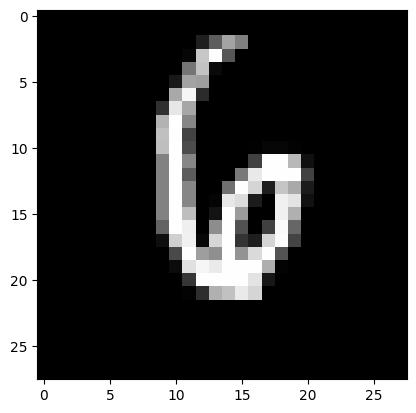

In [31]:
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

In [32]:
b[7500]

6

In [35]:
X_test_1 = X_train[:, 10000:15000] 
X_test_1.shape

(784, 5000)

In [59]:
t = c.feed_forward(X_test_1)
c1 = c.get_predictions(t)

In [60]:
Y_train[10000:15000].shape

(5000,)

In [61]:
np.sum(c1 == Y_train[10000:15000])*100 / 5000

8.18